# King County Housing Prices Prediction




### Introduction:

King County, located in the state of Washington, encompasses a diverse range of urban, suburban, and rural communities, including the city of Seattle. The housing market in King County has been characterized by rapid growth, high demand, and escalating prices over the past decade, influenced by factors such as population growth, economic prosperity, and limited housing supply.

The King County Housing Price Prediction Project is an initiative aimed at accurately forecasting housing prices in King County, Washington. This project leverages advanced data analytics and machine learning techniques to provide precise and actionable insights into the factors influencing housing prices in the region. By analyzing historical data and current market trends, we aim to develop a robust predictive model that can assist homebuyers, sellers, real estate agents, and policymakers in making informed decisions.

***

# Objectives:

1. Determine the key influencing factors for the housing prices in the region.
2. Provide a valuable EDA (Exploratory Data Analysis) for stakeholders such as homebuyers, sellers, real estate professionals, and policymakers to make data-driven decisions regarding property transactions and urban planning.
3. Develop a machine learning model capable of predicting housing prices with high accuracy based on a variety of factors including property features, location, and market conditions.

***

## Data Understanding

The data set we are using for this project is from Kaggel website. This dataset contains more than 21,000 rows and 21 columns which describe or quantify the different aspects of the housing situation in the region. These features are crucial for achieving the objectives stated above.
We will load the data and check if there are any missing or null values that could impair our analysis. To do this properly we will follow the following steps:

1. Load the dataset.
2. Data cleaning where we will check for missing values and any limitations within the dataset and prepare the dataset.
3. Data exploration where we will clearly identify all the features and select the ones we are willing to work with.
4. Analysis of the data to come up with insights that we can learn about the housing situation in the region
5. Preparing the data for machine learning models to predict the housing prices given different variables.

***

## 1. Loading the Data

In [2]:
# Your code here - remember to use markdown cells for comments as well!

In [39]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px

import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
pio.renderers.default = 'notebook_connected'

In [4]:
csv_file_path = "data/kc_house_data.csv"


In a dataframe name "king_county_df" load "kc_house_data.csv" file in the cell below using "pd.read_csv" format

In [5]:
# reading the data into the king_county_df
king_county_df=pd.read_csv("data/kc_house_data.csv")
king_county_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [6]:
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Here are the key columns in the datasets:**

**id:** Unique identifier for each house sale.

**date:** Date of the house sale.

**price:** Sale price of the house.

**bedrooms:** Number of bedrooms in the house.

**bathrooms:** Number of bathrooms in the house.

**sqft_living:** Square footage of the living area.

**sqft_lot:** Square footage of the lot.

**floors:** Number of floors in the house.

**waterfront:** Whether the house has a waterfront view (0 for no, 1 for yes).

**condition:** Overall condition of the house.

**grade:** Overall grade given to the housing unit, based on King County grading system.

**sqft_above:** Square footage of the house above ground level.

**sqft_basement:** Square footage of the basement.

**yr_built:** Year the house was built.

**yr_renovated:** Year the house was renovated.

**zipcode:** Zip code of the house location.

**lat:** Latitude coordinate of the house.

**long:** Longitude coordinate of the house.

**sqft_living15:** Average square footage of interior housing living space for the nearest 15 neighbors.

**sqft_lot15:** Average square footage of the land lots of the nearest 15 neighbors.

Now lets get familiar with the data we have in our king_county_df. This step will include
1. Understanding the dimentionality of our dataset
2. Investigating what type of data it contains, and the data types used to store it
3. Dicovering how missing values are encoded, and how many there are
4. Getting a feel for what information it does and doesn't contain

In the cell below,lets inspect the overall shape of the dataframe

Let's look at the info printout:

In [7]:
#Checking data shape
king_county_df.shape

(21597, 21)

# Interpretation

**Number of Rows (21597):**

This indicates we have 21,597 records or observations in our dataset. Each row provides information about a specific house sale in King County.

**Number of Columns (21):**

This indicates you have 21 different variables or features for each house sale. These variables contain information that can be used for analysis, such as numerical data (e.g., price, area sizes) and categorical data (e.g., waterfront status, condition).

In [8]:
#Checking dataframe info
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [9]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the columns containing
decimal numbers and full numbers are type float64 and int64 respectively.

Some columns have missing values, notably waterfront, view, and yr_renovated. Additionally, 
sqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.
"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the columns containing\ndecimal numbers and full numbers are type float64 and int64 respectively.\n\nSome columns have missing values, notably waterfront, view, and yr_renovated. Additionally, \nsqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.\n'

**Checking for missing values**

In [10]:
king_county_df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The output indicates the count of missing values   for each column in the King County dataset:

    waterfront has 2376 missing values, View has 63 missing values whereas yr_renovated has 3842 missing values

# Data Cleaning Steps

1.Convert date column to datetime format.

2.Convert sqft_basement column to numeric format.

**date: We convert this column to datetime format using pd.to_datetime.**

In [11]:
#conversion of date to dtype datetime to confirm timeframe of dataset
date_df=pd.to_datetime(king_county_df["date"])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [12]:
# Timestamp of the dataframe
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

This signifies that our dataset  ranges from period starting on May 2, 2014, and ending on May 27, 2015. 

**sqft_basement: We convert this column to numeric using pd.to_numeric. Setting errors='coerce' ensures that any non-numeric values are converted to NaN.**

In [13]:
# 2. Convert 'sqft_basement' to numeric, coerce errors to NaN
king_county_df['sqft_basement'] = pd.to_numeric(king_county_df['sqft_basement'], errors='coerce')

    
# Handling Missing values

 We decided to use imputation instead of dropping columns with missing values. Dropping columns with missing data can lead to a significant loss of valuable information,especially if the columns are important predictors. Imputation allows us to retain these columns and make use of the available data. Also if we drop columns with missing values, we might also end up dropping rows where those columns have missing values. This can reduce the sample size,potentially weakening the statistical power of our analysis and making our model less robust.


**waterfront: Since it's a categorical variable (likely binary), we impute missing values with 0 assuming houses without waterfront.**

We check value counts for waterfront column

In [14]:
king_county_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
# Impute 'waterfront' with 0 if missing
king_county_df['waterfront'].fillna(0, inplace=True)

**view: We impute missing values with the median view score, assuming a central tendency measure.**

In [16]:
# Impute 'view' with median value
median_view = king_county_df['view'].median()
king_county_df['view'].fillna(median_view, inplace=True)

**yr_renovated: We impute missing values with 0 assuming no renovation year recorded.**

We define a function that will help us determine the   percentage of missing data

In [17]:
# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    
    missing_data= column.isna().sum()                                       
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")

In [18]:
# percentage of missing data
missing_data(king_county_df,king_county_df["yr_renovated"])

Percentage of Missing Data: 17.79%


We have 17.79% of missing data for the Year renovated column.

We now replace missing values with a default value that makes sense in the context. For yr_renovated, this could be 0 (indicating no renovation).

In [19]:
# Impute 'yr_renovated' with 0 if missing
king_county_df['yr_renovated'].fillna(0, inplace=True)

**sqft_basement: After conversion, we check and fill any remaining NaNs with 0.**

In [20]:
# Verify if 'sqft_basement' has any remaining NaNs after conversion and fill them with 0
king_county_df['sqft_basement'].fillna(0, inplace=True)

**Bedrooms: Checking value counts for bedrooms**

In [21]:
# Checking the counts for each value in the column bedrooms
king_county_df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

From this we can conclude that majority of houses have less than 5 bedrooms 

Having  a house with 33 bedrooms might be impractical and not representative of typical data points. For this reason we are going to set an upper limit to ensure that the data remains realistic and relevant for practical applications, such as predicting average home prices.

In [22]:

# Define a reasonable upper limit for bedrooms
upper_limit = 11

# Replace outliers with the upper limit or another strategy
king_county_df['bedrooms'] = king_county_df['bedrooms'].apply(lambda x: upper_limit if x > upper_limit else x)

**Rechecking our value count for bedrooms**

In [23]:
# ReChecking the counts for each value in the column bedrooms
king_county_df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       2
Name: bedrooms, dtype: int64

In [24]:
king_county_df['id'].value_counts()


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

some houses seems like they were sold more than once between the 1 years timeframe 

In [25]:
#checking for how many houses sold more than once 
sold_more_than_once = len(king_county_df) - len(king_county_df['id'].value_counts())
sold_more_than_once 

177

So there has been 177 homes sold more than once in the period of one year from 2/05/2014 to 27/05/2015

In [26]:
king_county_df[king_county_df["id"]==795000620]

id        date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620   9/24/2014  115000.0         3        1.0         1080   
17589  795000620  12/15/2014  124000.0         3        1.0         1080   
17590  795000620   3/11/2015  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17588      6250     1.0         0.0   0.0  ...      5        1080   
17589      6250     1.0         0.0   0.0  ...      5        1080   
17590      6250     1.0         0.0   0.0  ...      5        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17588            0.0      1950           0.0    98168  47.5045 -122.33   
17589            0.0      1950           0.0    98168  47.5045 -122.33   
17590            0.0      1950           0.0    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250  

[3 rows x 21 columns]

# Verification:

**We check for any remaining missing values after these operations to ensure the dataset is clean.**

In [27]:
# Check for any remaining missing values in the dataset
missing_values = king_county_df.isnull().sum()
print("Remaining missing values:\n", missing_values[missing_values > 0])

Remaining missing values:
 Series([], dtype: int64)


In [28]:
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values were found

**Rechecking the dataset**

In [29]:
king_county_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Summary Statistics

Let's generate summary statistics for numerical columns to understand the distribution of data. This will provide us with statistical information such as mean, standard deviation, minimum, maximum, and quartile values for numerical features.

In [30]:
#Summary statistics for numerical columns
king_county_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.372181      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.905582      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Interpretation

**Central Tendency:** The mean and median prices provide measures of central tendency. The mean is influenced by extreme values (high-priced houses), while the median is less affected by outliers and represents the typical price of houses.

**Spread:** The standard deviation indicates the spread or variability of house prices. A higher standard deviation suggests a wider range of prices, indicating greater variability in housing costs.

**Distribution:** The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of house prices. For example, the interquartile range (Q3 - Q1) gives a measure of the spread of the middle 50% of prices.

**Outliers:** The minimum and maximum values highlight the range of prices observed in the dataset, including any potential outliers (extremely low or high prices).

In [31]:

#king_county_df['price_log'] = np.log1p(king_county_df['price'])

#king_county.hist(figsize = (20,18));

# Plot pair

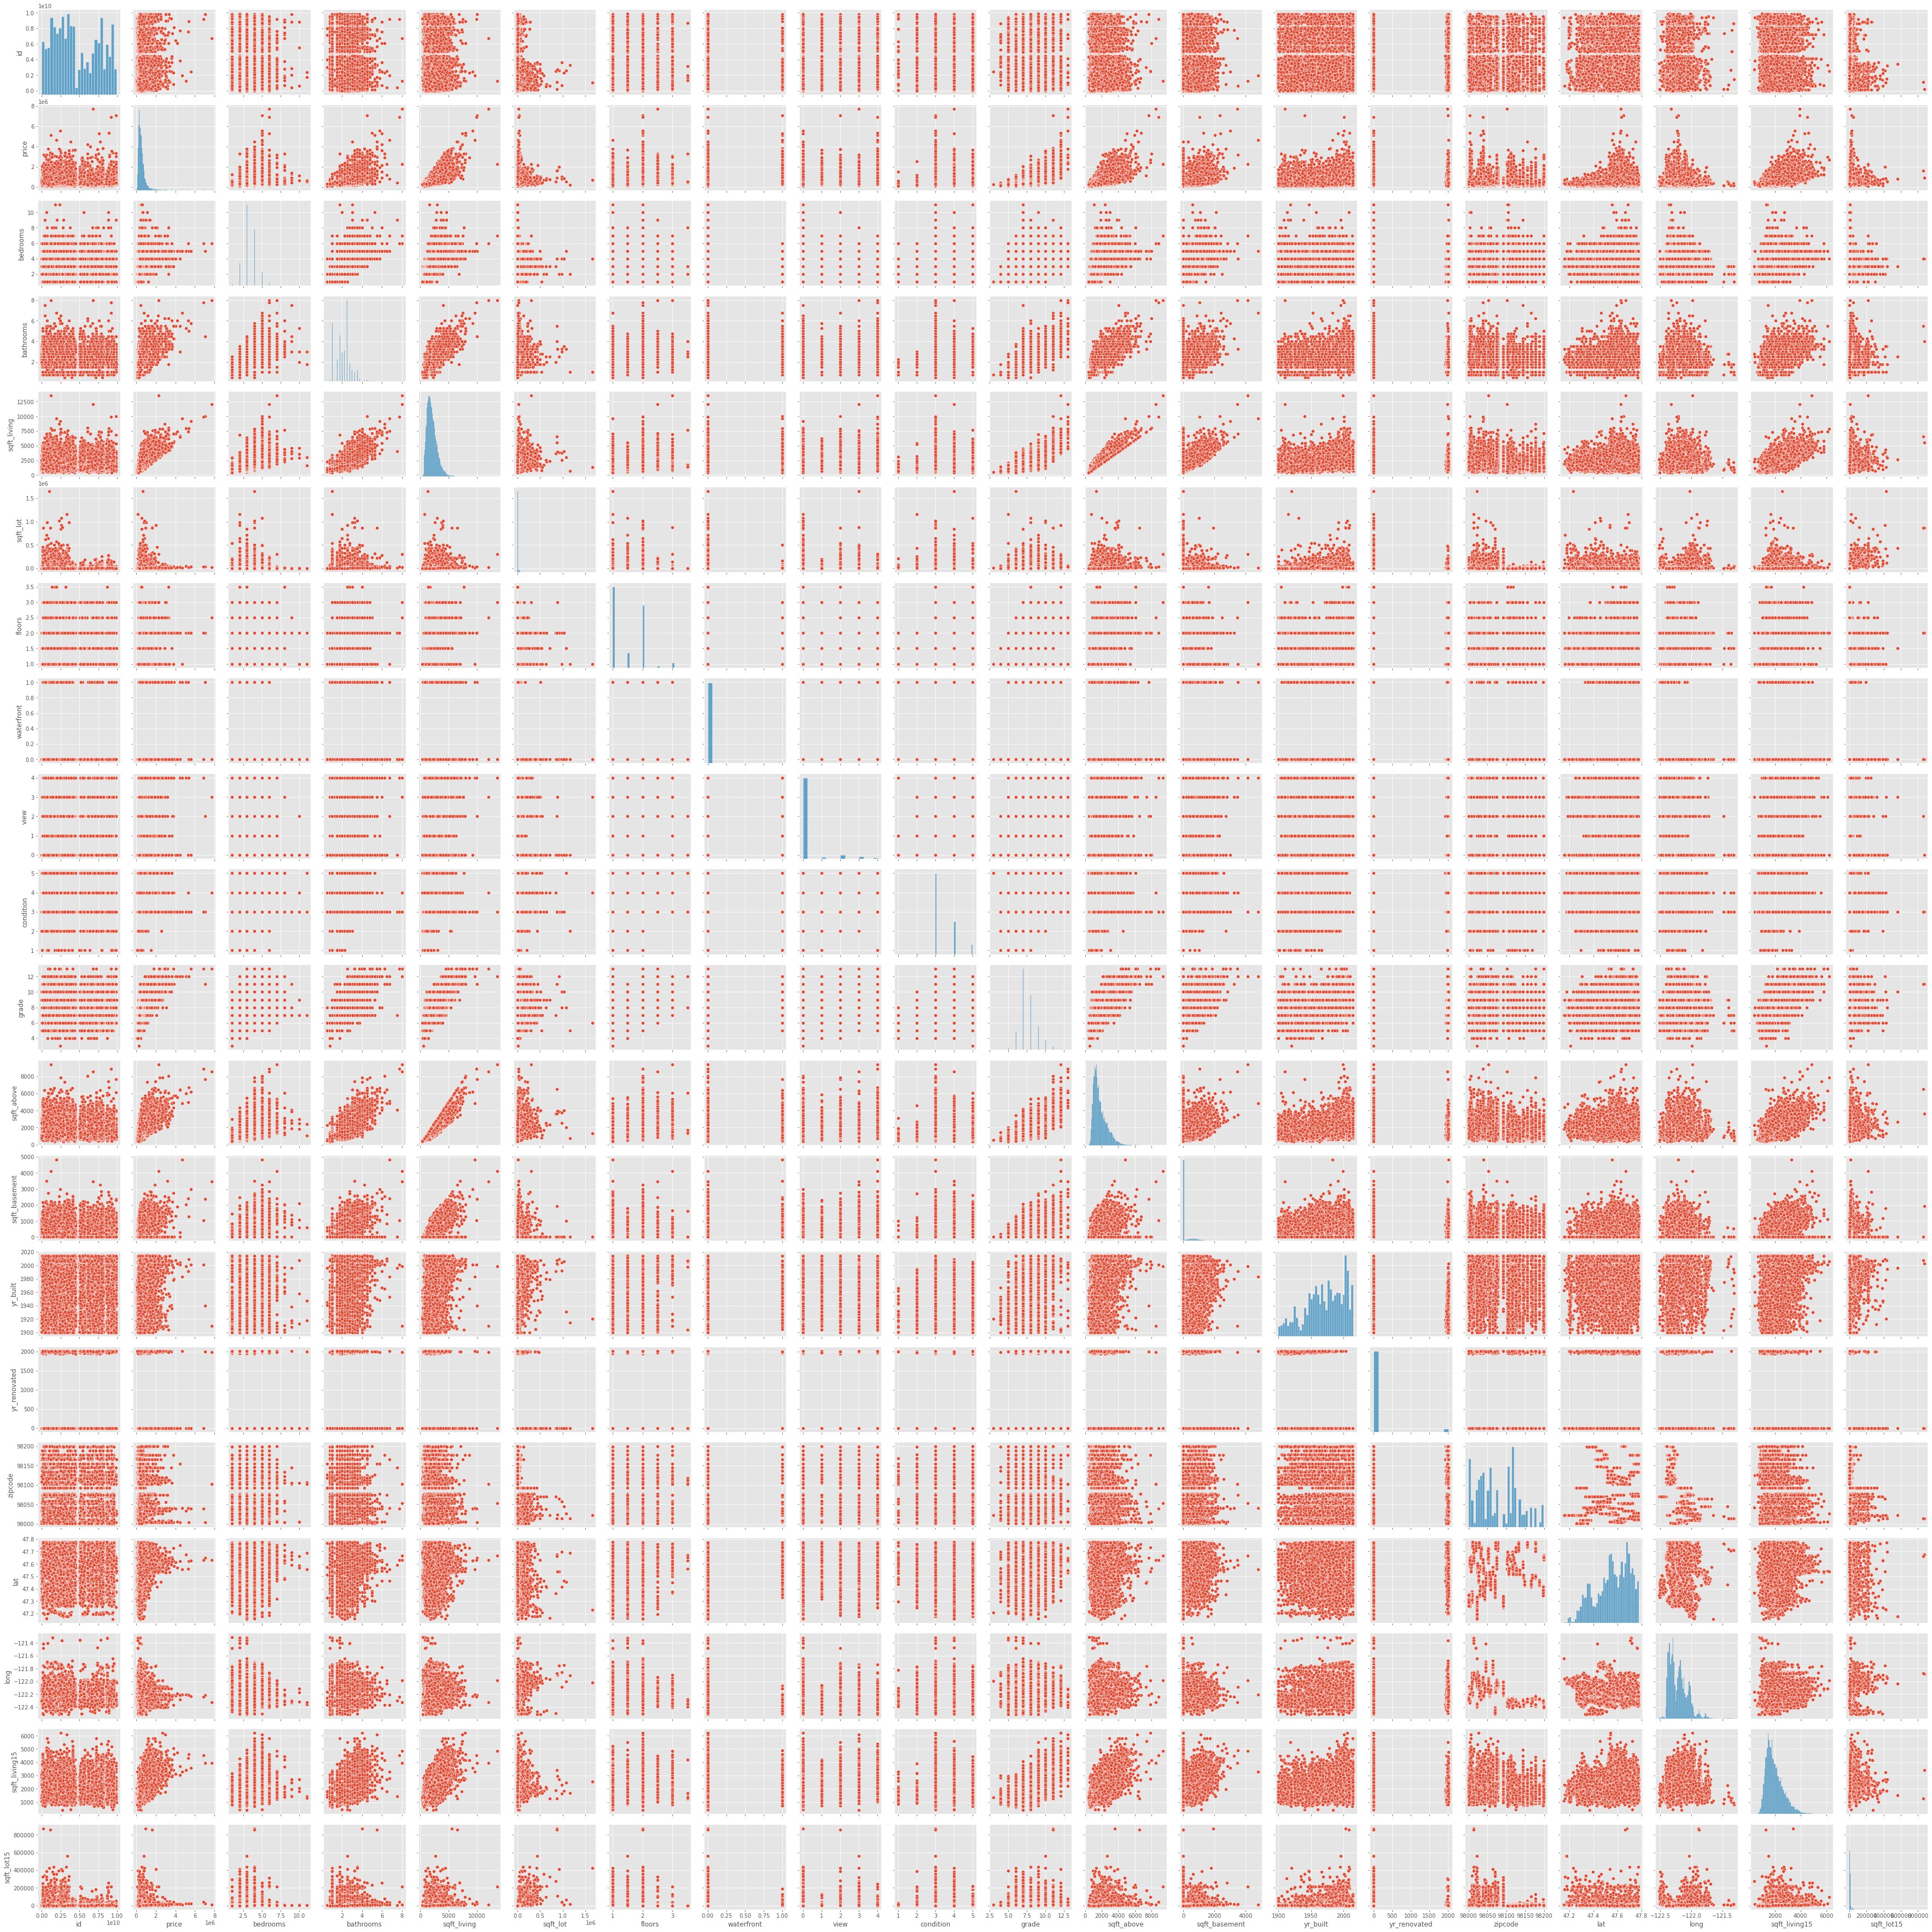

In [32]:
sns.pairplot(data=king_county_df)

# Correlation Heat Map

Let's generate a correlation heat map to visualize the correlation between features.

This will help us understand which features have strong relationships with the target variable (price).

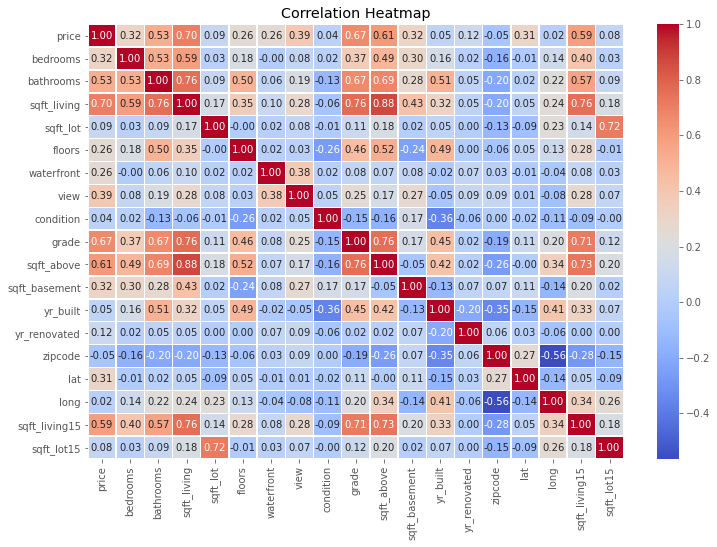

In [33]:
# Drop the 'id' column
df = king_county_df.drop(columns=['id'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.315546
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64


# Interpretation:
**Strong Positive Correlations (> 0.5):**

sqft_living (0.70), grade (0.67), sqft_above (0.61), bathrooms (0.53), sqft_living15 (0.59): These features have a strong positive correlation with price. This suggests that as these features increase (e.g., more square footage, higher grade), the house price tends to increase significantly.

**Moderate Positive Correlations (0.3 - 0.5):**

bedrooms (0.31), view (0.39), sqft_basement (0.32), floors (0.26), waterfront (0.26): These features also positively correlate with price, indicating that they contribute to higher house prices but to a lesser extent than the strongly correlated features.

**Weak Correlations (< 0.3):**

yr_renovated (0.12), condition (0.04), yr_built (0.05), sqft_lot15 (0.08), zipcode (-0.05), long (0.02): These features show weak correlations with price, suggesting that they have minimal impact on house prices or their impact is less direct.

**Negative Correlation (< 0):**

zipcode (-0.05): This indicates a very weak negative correlation with price, implying that house prices might be slightly lower in certain zip codes.

# Feature Selection

In [35]:
# Select relevant features
# Select relevant features
df = king_county_df[['sqft_living', 'grade', 'sqft_above', 'bathrooms',
                       'bedrooms','price']] 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   sqft_above   21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   bedrooms     21597 non-null  int64  
 5   price        21597 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1012.5 KB


In [36]:
df.head()

sqft_living  grade  sqft_above  bathrooms  bedrooms     price
0         1180      7        1180       1.00         3  221900.0
1         2570      7        2170       2.25         3  538000.0
2          770      6         770       1.00         2  180000.0
3         1960      7        1050       3.00         4  604000.0
4         1680      8        1680       2.00         3  510000.0


Based on the correlation analysis and considering the goal of predicting house prices (price) in King County, here are the most important features we should consider:

**Primary Features:**

**sqft_living:** Square footage of the living area (Correlation: 0.70).

**grade:** Overall grade given to the housing unit (Correlation: 0.67).

**sqft_above:** Square footage of the house above ground level (Correlation: 0.61).

**bathrooms:** Number of bathrooms in the house (Correlation: 0.53).

**sqft_living15:** Average square footage of interior housing living space for the nearest 15 neighbors (Correlation: 0.59).

**Additional Features:**

**view:** Quality of the view from the property (Correlation: 0.39).

**sqft_basement:** Square footage of the basement (Correlation: 0.32).

**bedrooms:** Number of bedrooms in the house (Correlation: 0.31).

**waterfront:** Whether the house has a waterfront view (Correlation: 0.26).

**floors:** Number of floors in the house (Correlation: 0.26).

# Why These Features?

**Strong Correlation:** These features exhibit the highest correlations with price based on our analysis, indicating a strong linear relationship with house prices in King County.

**Market Relevance:** Features like sqft_living, grade, and bathrooms are fundamental factors influencing property values, reflecting buyer preferences and market dynamics in the region.

**Predictive Power:** Models incorporating these features are likely to yield more accurate predictions of house prices due to their significant impact on property valuations.

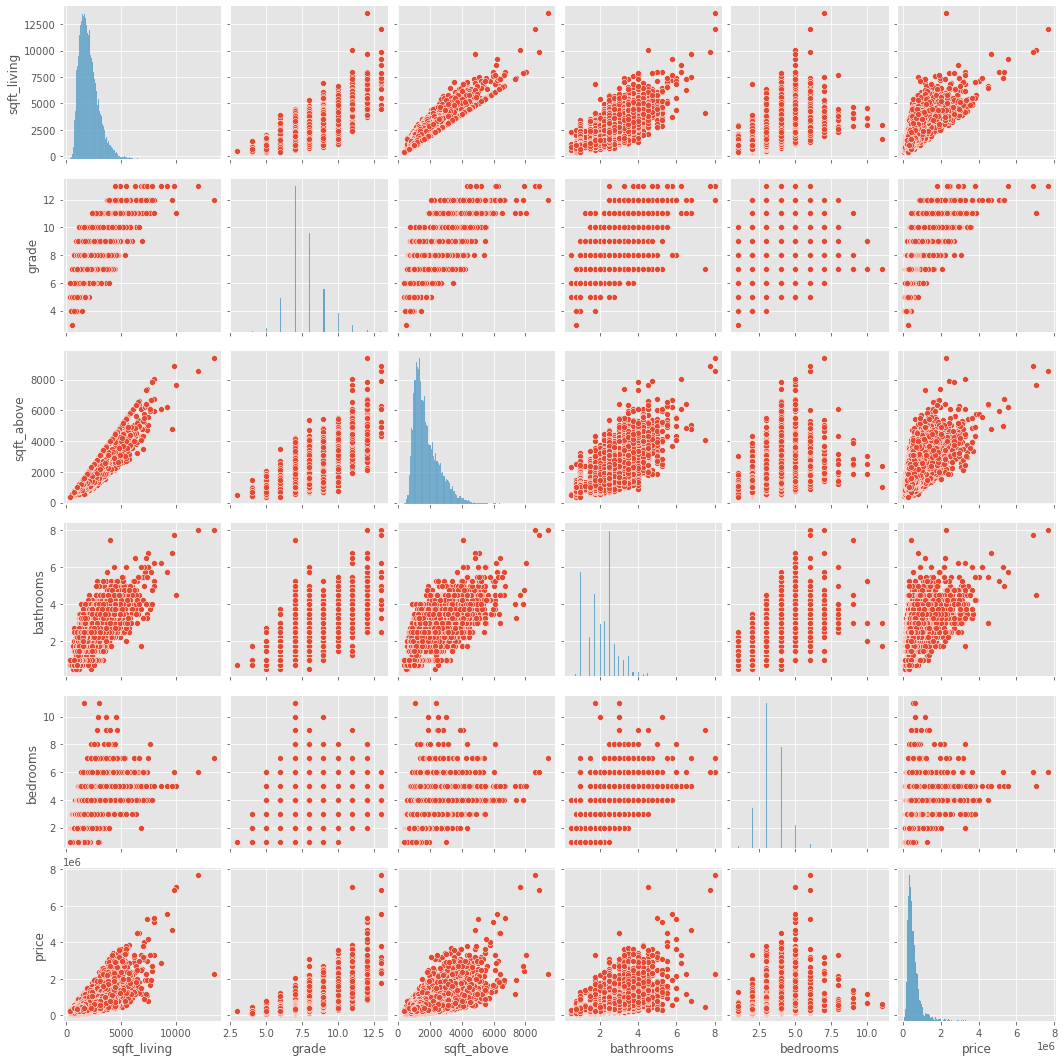

In [37]:
sns.pairplot(data=df)

# Data Cleaning

Checking for outliers

In [40]:
# Plotting box plots for each column
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[['sqft_living', 'grade', 'sqft_above', 'bathrooms',
                       'bedrooms','price']]'sqft_living', 'grade', 'sqft_above', 'bathrooms',

plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

SyntaxError: invalid syntax (<ipython-input-40-2825775df22a>, line 4)

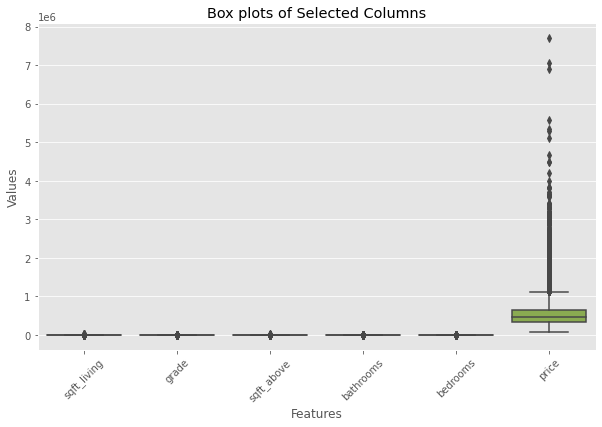

In [41]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [44]:
df3 = df[['sqft_above', 'sqft_living']]

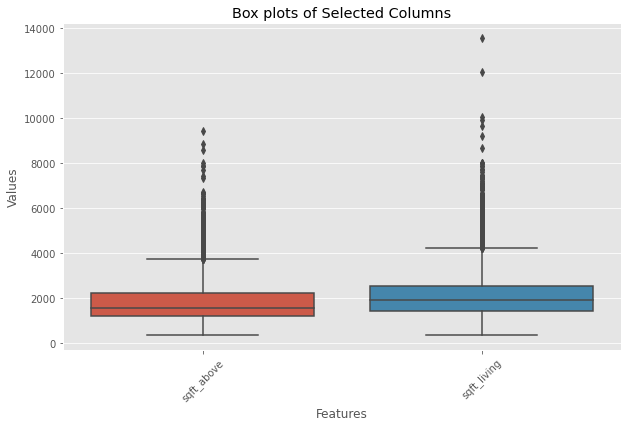

In [45]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [47]:
df4 = df[['bathrooms', 'bedrooms', 'grade']]

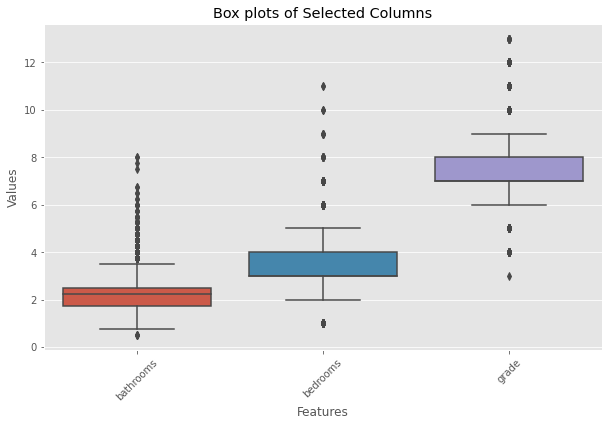

In [48]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Get the Outliers 

In [49]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

print(f'Number of outliers: {len(outlier_indices)}')

Number of outliers: 2945


From the printout of numbers of outlier  we can see we have 2945 outlier present 

In [50]:
def replace_outliers_with_mean(df):
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        outliers = (df[column] - mean).abs() > 3 * std
        df.loc[outliers, column] = mean
    return df

# Replace 'df' with your DataFrame
df = replace_outliers_with_mean(df)
print(df)

       sqft_living  grade  sqft_above  bathrooms  bedrooms     price
0           1180.0    7.0      1180.0       1.00       3.0  221900.0
1           2570.0    7.0      2170.0       2.25       3.0  538000.0
2            770.0    6.0       770.0       1.00       2.0  180000.0
3           1960.0    7.0      1050.0       3.00       4.0  604000.0
4           1680.0    8.0      1680.0       2.00       3.0  510000.0
...            ...    ...         ...        ...       ...       ...
21592       1530.0    8.0      1530.0       2.50       3.0  360000.0
21593       2310.0    8.0      2310.0       2.50       4.0  400000.0
21594       1020.0    7.0      1020.0       0.75       2.0  402101.0
21595       1600.0    8.0      1600.0       2.50       3.0  400000.0
21596       1020.0    7.0      1020.0       0.75       2.0  325000.0

[21597 rows x 6 columns]


# Data Analysis

**Analyse how does the square footage of the living area relate to price**

To understand the relationship between the square footage of the living area and the price, we can create a scatter plot. This will give us a visual representation of the data.


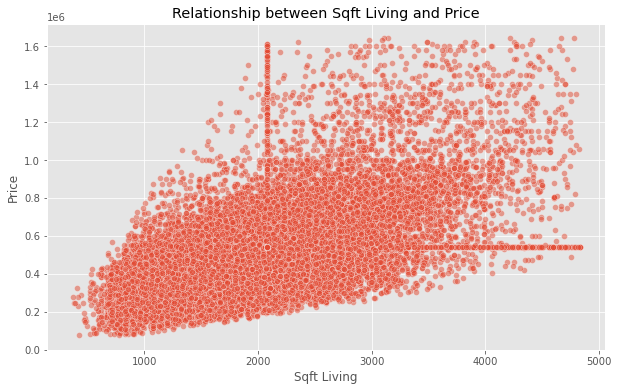

In [51]:

# Visualize the relationship between sqft_living and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

**Observation:**

 The scatter plot shows a clear positive relationship between sqft_living and price, indicating that larger living areas generally command higher prices.

**Implication:**

 This insight suggests that square footage is a significant factor in determining property prices in king house sales, which aligns with common expectations in real estate markets.

# 2.Data Analysis

**Analyse how does the squarefoot basement  relate to price**




          bathrooms         price
count  21597.000000  2.159700e+04
mean       2.091698  5.076360e+05
std        0.720923  2.570515e+05
min        0.500000  7.800000e+04
25%        1.750000  3.220000e+05
50%        2.250000  4.500000e+05
75%        2.500000  6.250000e+05
max        4.250000  1.640000e+06


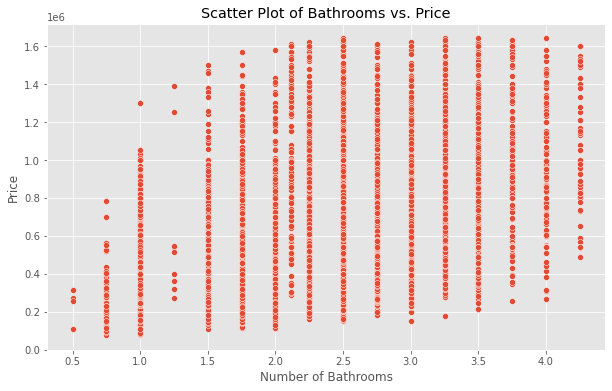

In [55]:
# Exploratory Data Analysis
print(df[['bathrooms', 'price']].describe())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bathrooms'], y=df['price'])
plt.title('Scatter Plot of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

The scatter plot of bathrooms versus house prices shows a positive trend, indicating that houses with more bathrooms tend to have higher prices. However, the relationship may not be perfectly linear, suggesting the need for further analysis.

# Analysis 3

**Analyse The Impact of square footage of house apart from basement to price**




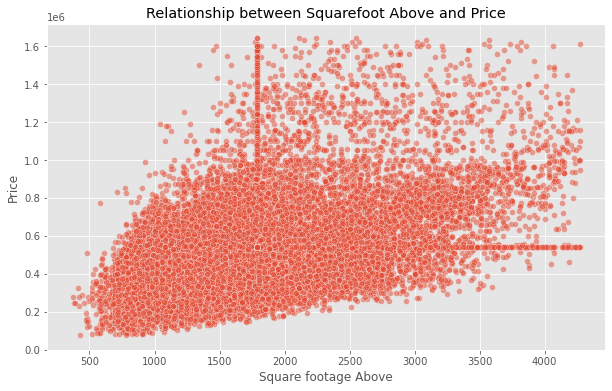

In [56]:
# Scatter plot of Squarefoot Above vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_above', y='price', data=df, alpha=0.5)
plt.title('Relationship between Squarefoot Above and Price')
plt.xlabel('Square footage Above')
plt.ylabel('Price')
plt.show()

Scatter Plot Analysis:
General Trend:

Properties with larger sqft_above generally tend to have higher prices. This suggests that above-ground living space significantly influences property values.
Positive Correlation:

There appears to be a positive correlation between sqft_above and price, meaning as the square footage above ground increases, so does the property price.
Outliers:

Outliers may be present, indicating properties that deviate from the general trend. These outliers could represent unique properties with exceptionally large or small above-ground areas compared to their price.
Density of Data Points:

The density of data points can provide insights into the distribution of property types and market segments. Clusters of data points may indicate common property sizes and price ranges in the dataset.
Interpretation:
Market Value of Space: The scatter plot underscores the market's valuation of living space, particularly above ground. Larger sqft_above is typically associated with more spacious and potentially more desirable properties, influencing higher prices.

Property Differentiation: Properties with similar sqft_above values but different prices may indicate factors such as location, condition, or amenities that affect property values beyond just size.

Decision-Making Insights: For buyers and sellers, understanding the relationship depicted in the scatter plot helps in setting realistic expectations, negotiating prices, and strategizing based on the perceived value of above-ground living space.

Next Steps:
Further Analysis: Consider exploring additional factors such as location, property age, or specific features (e.g., view, condition) to refine the understanding of how sqft_above impacts property prices in different contexts.

Comparative Analysis: Compare scatter plots across different subsets of data (e.g., by neighborhood or property type) to identify variations in the relationship between sqft_above and price.

Modeling Considerations: Incorporate sqft_above as a feature in predictive models to quantify its impact on property prices and enhance accuracy in forecasting market trends.

By leveraging these insights from the scatter plot analysis of sqft_above and price, stakeholders in real estate can make informed decisions, optimize property investments, and understand market dynamics more effectively.

# Heat map for the selected feature

<AxesSubplot:>

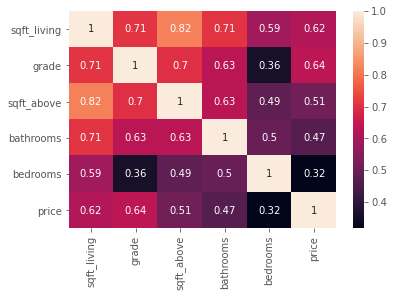

In [57]:
sns.heatmap(data=df.corr(),annot=True)

In [58]:
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.315546
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64


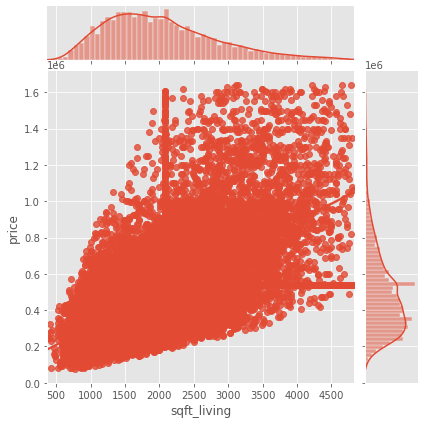

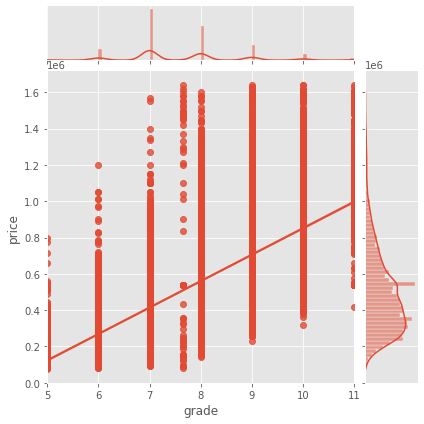

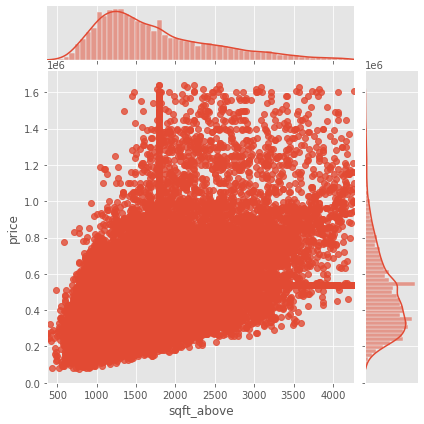

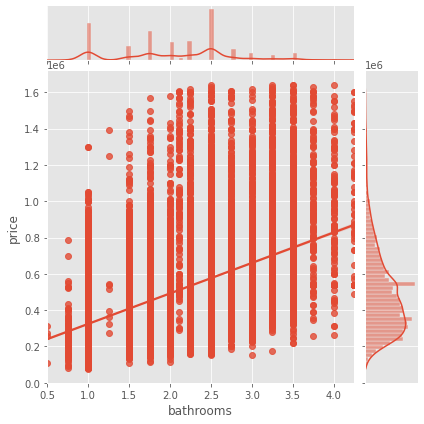

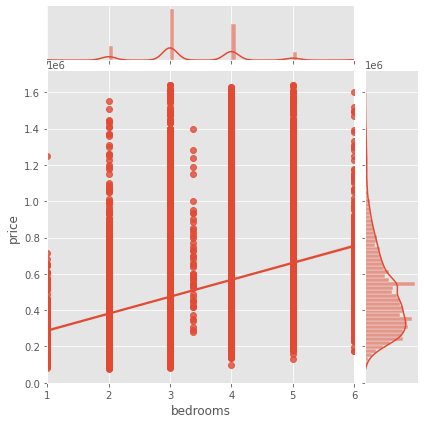

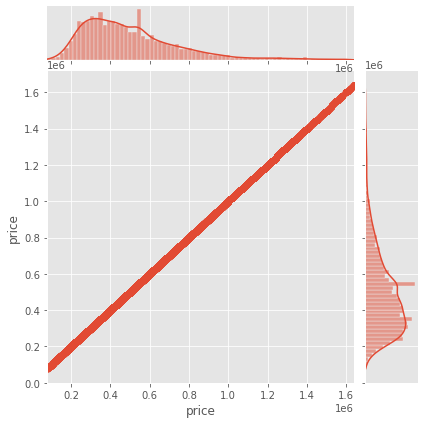

In [60]:
# Exploratory Data Analysis
for feature in df:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

## Recommendation 
This EDA shows that the housing market in King County is highly influenced by the total footage of living space. Even though  the grade a house receives and the number of bathrooms of a house as well influence the price, the power of the total footage of living space is vividly clear. Stakeholders such as homebuyers, sellers, real estate professionals, and policymakers need to pay attention of the total footage of living space to get insights and make data-driven decisions regarding property transactions and urban planning based on this EDA.

***

# Question 2 Develop a Multiple Regression Model for Predicting House Prices:

a. Objective: Build a predictive model that accurately estimates housing prices based on various  

b. Feature Selection: Use techniques such as Recursive Feature Elimination (RFE),  to select relevant features.

c. Model Selection: Test various models including:

d. Linear Models: Linear Regression

e. Finally we will do Model Evaluation: Use metrics like R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to evaluate model performance. Perform cross-validation to ensure robustness.


# Model 1

In [61]:
df2=king_county_df[['bedrooms','bathrooms','price','waterfront','condition']]
df.head()

sqft_living  grade  sqft_above  bathrooms  bedrooms     price
0       1180.0    7.0      1180.0       1.00       3.0  221900.0
1       2570.0    7.0      2170.0       2.25       3.0  538000.0
2        770.0    6.0       770.0       1.00       2.0  180000.0
3       1960.0    7.0      1050.0       3.00       4.0  604000.0
4       1680.0    8.0      1680.0       2.00       3.0  510000.0

In [62]:
df_transformed = df2.copy()

In [63]:
df_transformed['price_log'] = np.log(df_transformed['price'])

In [64]:
print(df_transformed.head())

   bedrooms  bathrooms     price  waterfront  condition  price_log
0         3       1.00  221900.0         0.0          3  12.309982
1         3       2.25  538000.0         0.0          3  13.195614
2         2       1.00  180000.0         0.0          3  12.100712
3         4       3.00  604000.0         0.0          5  13.311329
4         3       2.00  510000.0         0.0          3  13.142166


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [71]:
# Separate features and target variable
X = df_transformed[['bedrooms','bathrooms','waterfront','condition']]
y = df_transformed['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     2755.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:12:18   Log-Likelihood:                -12340.
No. Observations:               21597   AIC:                         2.469e+04
Df Residuals:                   21592   BIC:                         2.473e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8698      0.019    609.103      0.0

# Interpretation of Results

**R-squared**

**R-squared:** 0.3260: This indicates that approximately 32.60% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. This is a moderate level of explanatory power and suggests that while the selected features (sqft_living, grade, lat, long) are relevant, there are other important factors influencing house prices not captured by this model.

**Mean Absolute Error (MAE)**

**MAE: 0.3452:** This represents the average magnitude of errors in predicting the logarithmically transformed prices. In this case, the MAE is 0.3452 units on the log scale, which is a typical prediction error magnitude for this transformed variable.

# Model 2

In [72]:
# Select relevant features
df = king_county_df[['price','sqft_living', 'grade', 'bathrooms'
                       ]]
df_transformed_4 = df.copy()
df_transformed_4['price_log'] = np.log(df_transformed_4['price'])
df_transformed_4.head()

price  sqft_living  grade  bathrooms  price_log
0  221900.0         1180      7       1.00  12.309982
1  538000.0         2570      7       2.25  13.195614
2  180000.0          770      6       1.00  12.100712
3  604000.0         1960      7       3.00  13.311329
4  510000.0         1680      8       2.00  13.142166

In [73]:
# Separate features and target variable
X = df_transformed_4[['sqft_living', 'grade','bathrooms']]
y = df_transformed_4['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

R-squared: 0.5524369846149135
Mean Absolute Error: 0.28244668194324213
Coefficients: [ 0.00022693  0.18977814 -0.01739455]
Intercept: 11.16045237811133


# Interpretation of Results

**R-squared**

**R-squared:** 0.5524: This indicates that approximately 55.24% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. This is a moderate level of explanatory power and suggests that while the selected features (sqft_living, grade, bathrooms) are relevant, there could be other important factors influencing house prices not captured by this model.

**Mean Absolute Error (MAE)**

**MAE: 0.2824:** This represents the average magnitude of errors in predicting the logarithmically transformed prices. In this case, the MAE is 0.2824 units on the log scale, which is a typical prediction error magnitude for this transformed variable.

***

#  Model 3


In [80]:
df3 = king_county_df[['price','sqft_living',  'sqft_above', 'grade',
                       'bedrooms']]
df_transformed_2 = df3.copy()

In [81]:
df_transformed_2['sqft_living_log'] = np.log1p(df_transformed_2['sqft_living'])
df_transformed_2['sqft_above'] = np.log1p(df_transformed_2['sqft_above'])

In [82]:
df_transformed_2['price_log'] = np.log(df_transformed_2['price'])
df_transformed_2.head()

price  sqft_living  sqft_above  grade  bedrooms  sqft_living_log  \
0  221900.0         1180    7.074117      7         3         7.074117   
1  538000.0         2570    7.682943      7         3         7.852050   
2  180000.0          770    6.647688      6         2         6.647688   
3  604000.0         1960    6.957497      7         4         7.581210   
4  510000.0         1680    7.427144      8         3         7.427144   

   price_log  
0  12.309982  
1  13.195614  
2  12.100712  
3  13.311329  
4  13.142166

In [83]:
# Separate features and target variable
X = df_transformed_2[['sqft_living_log','bedrooms','grade','sqft_above']]
y = df_transformed_2['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

R-squared: 0.5510599966891635
Mean Absolute Error: 0.27919212459959014
Coefficients: [ 0.64341513 -0.03243659  0.21711844 -0.23214976]
Intercept: 8.354009469686371


**R-squared**

**R-squared: 0.5510:** This indicates that approximately 55.10% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. This is a moderate level of explanatory power, suggesting that the selected features explain a significant portion of the variation in house prices.

**Mean Absolute Error (MAE)**

**MAE: 0.2791:** This represents the average magnitude of the errors in predicting the logarithmically transformed prices. An MAE of 0.2791 units on the log scale indicates a reasonably good prediction accuracy, better than the previous model with fewer features.

**Coefficients**

**sqft_living (0.6434):** For each additional unit increase in square footage of living space, the logarithm of the price is expected to increase by approximately 0.6434 units, holding other factors constant. This shows a substantial positive impact of living space on house prices.

# Model 4

In [84]:
df_transformed_5 = king_county_df[['sqft_living', 'grade', 'price', 'lat', 'long']]
df_transformed_5['price_log'] = np.log(df_transformed['price'])
df_transformed_5.head()


sqft_living  grade     price      lat     long  price_log
0         1180      7  221900.0  47.5112 -122.257  12.309982
1         2570      7  538000.0  47.7210 -122.319  13.195614
2          770      6  180000.0  47.7379 -122.233  12.100712
3         1960      7  604000.0  47.5208 -122.393  13.311329
4         1680      8  510000.0  47.6168 -122.045  13.142166

In [85]:
# Separate features and target variable
X = df_transformed_5[['sqft_living','grade' ,'lat','long']]
y = df_transformed_5['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

R-squared: 0.7055079148661398
Mean Absolute Error: 0.21937400751746897
Coefficients: [ 2.43869523e-04  1.59146432e-01  1.43459993e+00 -2.69364189e-01]
Intercept: -89.82739174415738



# Interpretation of Results

**R-squared**

**R-squared:** 0.7055: This indicates that approximately 70.55% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. 

**Mean Absolute Error (MAE)**

**MAE: 0.2194:** This represents the average magnitude of the errors in predicting the logarithmically transformed prices. In this case, the MAE is 0.2194 units on the log scale.
A lower MAE indicates better prediction accuracy. This idicaates that our model which have an MAE of 0.2194 is more accurate in predicting the log-transformed house prices than our Previous model with an MAE of 0.2789.


**Coefficients**

**sqft_living (0.0002439):** For each additional unit increase in square footage of living space, the logarithm of the price is expected to increase by approximately 0.0002439 units, holding other factors constant.

**grade (0.1591):** Each one-unit increase in the grade of the house is associated with an increase in the logarithm of the price by about 0.1591 units, holding other factors constant.

**lat (1.4346):** Each one-degree increase in latitude is associated with an increase in the logarithm of the price by approximately 1.4346 units, holding other factors constant. This indicates that 
latitude has a significant impact on house prices in the logarithmic scale.

**long (-0.2694):** Each one-degree increase in longitude is associated with a decrease in the logarithm of the price by approximately 0.2694 units, holding other factors constant.

**Intercept**

**Intercept (-89.8274):** The intercept represents the expected value of the logarithm of the house price when all predictors are zero. Since we're dealing with logarithmic transformation, this **interpretation is in terms of logarithmic units.

# Summary of Overall Models Performance:

**Model 1:** shows a relatively low R-squared value (0.3244), indicating that it explains only 32.44% of the variance in the data. Its MAE is 0.3452, suggesting a moderate level of prediction error.

**Model 2:** shows an improved R-squared value 0f 0.5511 explaining 55.11% of the variance and a 0.28 MAE value. However this is not satisfactory level of prediction given the significance of the model.

**Model 3:** has a lower R-squared value (0.5485), explaining 54.85% of the variance. Its MAE is 0.278, indicating a weaker predictive performance than Model 2.

**Model 4:** has the highest R-squared value (0.7063), explaining 70.63% of the variance. It also has the lowest MAE (0.21), suggesting it provides the most accurate predictions.

***

## Recommendation 3:

The best model for predicting housing prices in King County, based on the provided dataset and transformation techniques, is Model 4. This model has a high R-squared value of 0.7063, indicating it explains 70.63% of the variance in the logarithmically transformed house prices. It also has a low MAE of 0.2194, indicating it has the lowest prediction error. This model effectively captures the mean and standard deviation of the logarithmically transformed house prices.

With the highest R-squared value of 0.7063, and lowest MAE of 0.2194, this Model is the most accurate and reliable model for predicting housing prices.
***



# Moderate Fit:

An R-squared value of 0.7 indicates a moderate level of explanatory power. This suggests that our model is capturing some, but not all, of the important factors influencing house prices. It's common in real estate data where many factors can influence prices.
Error Magnitude:

The MAE of 0.2 provides a clear understanding of the average prediction error. Given that MAE is in the same units as our target variable (log-transformed house prices), we can interpret this as the average deviation of our predictions from the actual values.

In [86]:
import statsmodels.api as sm

# Define the predictors and target variable
X = df_transformed_5[['sqft_living','grade' ,'lat','long']]
y = df_transformed_5['price_log']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.309e+04
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:34:11   Log-Likelihood:                -3496.3
No. Observations:               21597   AIC:                             7003.
Df Residuals:                   21592   BIC:                             7043.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -89.2590      1.781    -50.131      

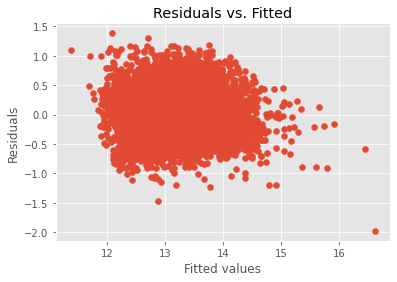

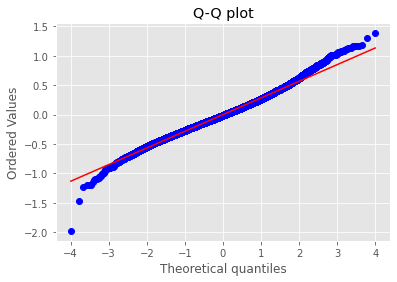

In [87]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residuals vs. Fitted
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

 

**Visualize Predicted vs. Actual Prices**

The predicted vs. actual prices plot helps us see how well the model's predictions match the actual values. Ideally, points should lie along the 45-degree line, indicating perfect predictions.


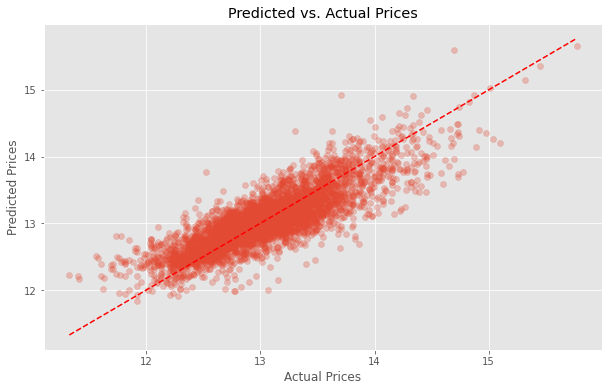

In [88]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()

**Perform Residual Analysis**

Residual analysis involves examining the residuals (differences between actual and predicted values). Residual plots and histograms can help identify systematic errors or biases.

**Residuals vs. Predicted Prices**
A residuals vs. predicted prices plot helps check for patterns. Ideally, residuals should be randomly distributed around zero.

**Histogram of Residuals**

A histogram of residuals will  help us check if they are normally distributed around zero.

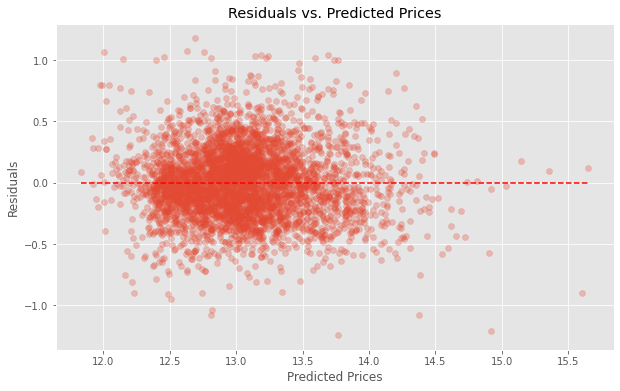

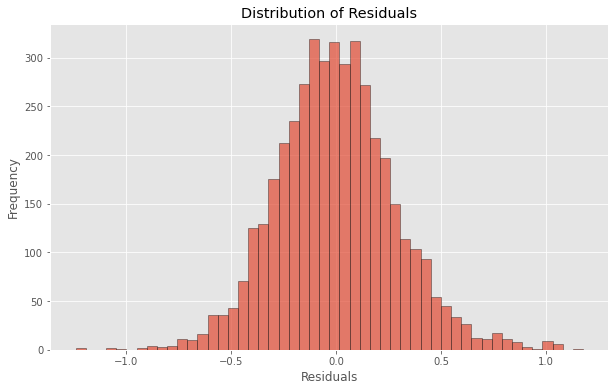

In [89]:
#Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Prices")
plt.show()

# Plot Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

***

## Conclusion:

The project aimed to:

**1:** Identify key features influencing housing prices in the region.

**2:** Provide a valuable Exploratory Data Analysis (EDA) for stakeholders such as homebuyers, sellers, real estate professionals, and policymakers to make informed decisions regarding property transactions and urban planning.

**3:** Develop a machine learning model to accurately predict housing prices based on property features, location, and market conditions.

Using the King County housing dataset, we examined the data, cleaned it of missing and NaN values, performed an analysis, and developed a model that predicts housing prices with 70% accuracy based on various factors.



## Recommendations
**Investment Strategy:** Houses with larger living spaces, higher grades, and more bathrooms tend to be more expensive. Investors should focus on these features to maximize resale profits or find affordable options by considering these factors.

**Market Insights:** The EDA reveals that the King County housing market is significantly influenced by the total footage of living space. Stakeholders can use these insights for data-driven decisions in property transactions and urban planning.

**Model Selection:** The best model for predicting housing prices in King County is Model 4, which has an R-squared value of 0.7063 and a low Mean Absolute Error (MAE) of 0.2194. This model explains 70.63% of the variance in logarithmically transformed house prices and has the lowest prediction error, effectively capturing the mean and standard deviation of the transformed prices.
